
In this notebook, we will discover and explore data from the stock market, particularly some technology stocks (Apple, Amazon, Google, and Microsoft). We will learn how to use yfinance to get stock information, and visualize different aspects of it using Seaborn and Matplotlib. we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through x_11 and x_13 model

We'll be answering the following questions along the way:

1. What was the change in price of the stock over time? 
2. What was the daily return of the stock on average? 
3. What was the moving average of the various stocks? 
4. What was the correlation between different stocks'? 
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using x_11 and x_13 model)

## importing libraries

In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
# For time stamps
from datetime import datetime

### The tech stocks we'll use for this analysis

In [27]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN'] ## used stocks symbols to fetch historical market data
# Set up End and Start times for data grab
tech_list = ['AAPL','GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

#### retrieves historical stock data using yfinance for multiple technology companies,

In [28]:
for stock in tech_list: ## iterates over each stock ticker symbol in the tech_list.
    globals()[stock] = yf.download(stock, start, end) ## dynamically creates variables for each stock symbol in the global namespace using the globals() function.
company_list = [AAPL, GOOG, MSFT, AMZN]  ## stock ticker symbol
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"] ##  list of technology companies
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
df = pd.concat(company_list, axis=0).reset_index() ## Concatenates the DataFrames in company_list
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,company_name
990,2023-05-15,111.150002,112.290001,109.250000,111.199997,111.199997,53011100,AMAZON
991,2023-05-16,111.050003,114.790001,111.050003,113.400002,113.400002,71472900,AMAZON
992,2023-05-17,114.889999,115.830002,114.220001,115.500000,115.500000,65655200,AMAZON
993,2023-05-18,116.690002,118.599998,116.339996,118.150002,118.150002,73174100,AMAZON
994,2023-05-19,118.160004,118.309998,115.699997,116.250000,116.250000,54990200,AMAZON
995,2023-05-22,116.769997,116.769997,114.250000,115.010002,115.010002,70741100,AMAZON
996,2023-05-23,114.269997,117.139999,113.779999,114.989998,114.989998,67576300,AMAZON
997,2023-05-24,115.349998,117.339996,115.019997,116.750000,116.750000,63487900,AMAZON
998,2023-05-25,116.629997,116.870003,114.309998,115.000000,115.000000,66496700,AMAZON
999,2023-05-26,116.040001,121.500000,116.019997,120.110001,120.110001,96681000,AMAZON


Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data. Notice also that weekends are missing from the records. 
Quick note: Using globals() is a sloppy way of setting the DataFrame names

### checking nulls and duplicates in the dataset



In [29]:
import pandas as pd
# Check for duplicates
duplicates = df.duplicated().sum()
# Check for null values
null_values = df.isnull().sum().sum()
# Print the results
print("Number of duplicate rows:", duplicates)
print("Number of null values:", null_values)


Number of duplicate rows: 0
Number of null values: 0


### Descriptive Statistics about the data

In [30]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,151.188161,153.090200,149.560360,151.440120,150.936809,7.409591e+07
std,12.176154,11.950078,12.438088,12.266710,12.326526,2.239478e+07
min,126.010002,127.769997,124.169998,125.019997,124.656975,3.519590e+07
25%,142.699997,144.592503,140.917496,142.912502,142.261520,5.803380e+07
50%,149.839996,151.655006,148.104996,150.674995,150.093491,7.044820e+07
75%,160.707497,162.305000,159.462502,160.640003,160.418121,8.366650e+07
max,176.389999,176.389999,174.940002,175.429993,175.429993,1.647624e+08


In [31]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,103.659471,105.245354,102.452534,103.879534,103.879534,2.794797e+07
std,9.784776,9.968147,9.806937,9.950167,9.950167,1.090854e+07
min,85.510002,86.550003,83.449997,83.489998,83.489998,8.567800e+06
25%,95.749998,97.344997,94.440002,95.835001,95.835001,2.161230e+07
50%,102.799999,104.205002,101.857502,103.549999,103.549999,2.526950e+07
75%,111.295748,113.192377,109.319126,111.695000,111.695000,3.140252e+07
max,125.209999,127.050003,123.449997,125.870003,125.870003,9.779860e+07


In [32]:
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,260.862240,264.011560,258.003960,261.193440,259.737932,2.892336e+07
std,23.594817,23.435372,23.830482,23.868930,24.067656,1.017303e+07
min,217.550003,220.410004,213.429993,214.250000,212.649261,9.200800e+06
25%,243.120003,245.302502,240.187500,242.307495,240.911121,2.249102e+07
50%,256.589996,259.824997,253.260002,256.270004,254.238274,2.669530e+07
75%,277.174995,280.557503,275.177505,276.402504,275.216148,3.209810e+07
max,324.019989,333.399994,323.880005,332.890015,332.890015,8.610200e+07


In [33]:
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,107.842200,109.664974,106.058636,107.907938,107.907938,6.972626e+07
std,14.953757,15.195333,14.849485,15.007654,15.007654,2.659983e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,3.508860e+07
25%,95.992498,97.447498,94.157501,96.229998,96.229998,5.308900e+07
50%,104.369999,106.169998,102.864998,104.640003,104.640003,6.315025e+07
75%,116.749998,118.767500,114.782501,116.677500,116.677500,7.634540e+07
max,143.910004,146.570007,142.000000,144.779999,144.779999,2.231334e+08


note : We have only 250 records in one year because weekends are not included in the data.


## checking the trend of data

### Closing Price
The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.



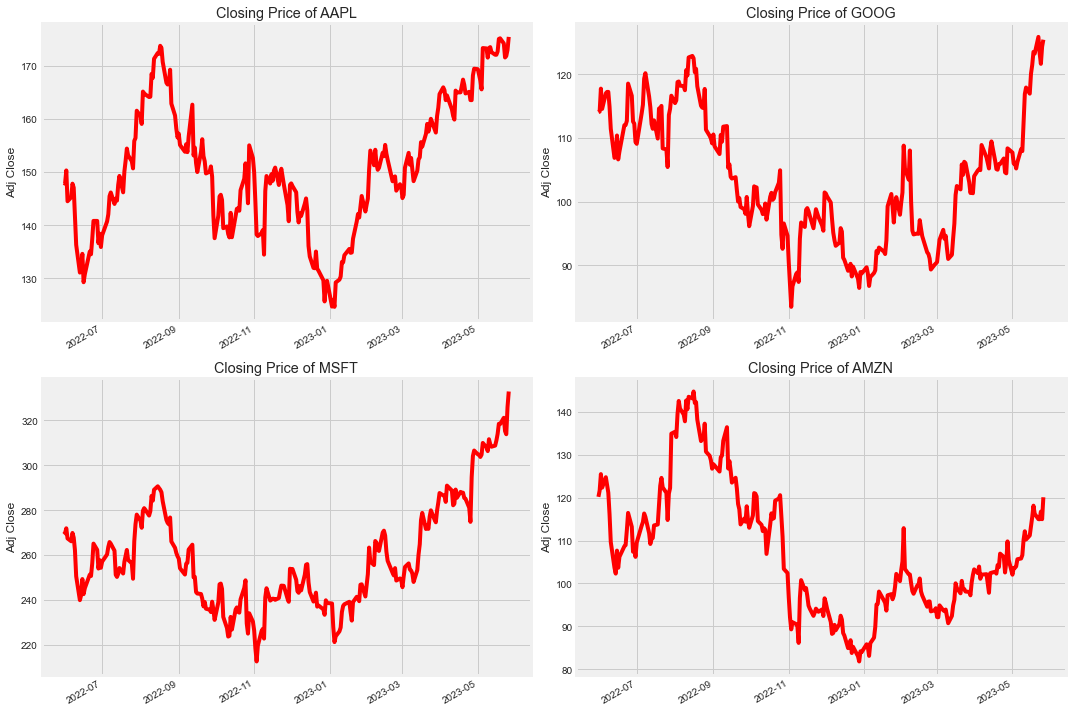

In [34]:
plt.figure(figsize=(15, 10)) ## size of graph
plt.subplots_adjust(top=1.25, bottom=1.2) ## adjusts the spacing between subplots
for i, company in enumerate(company_list, 1): ## for loop to iterate over each company in the company_list
    plt.subplot(2, 2, i) ## This line creates a subplot grid with 2 rows, 2 columns, and the current index i
    company['Adj Close'].plot(color='red') ## adjusted closing prices for the current company. 
    plt.ylabel('Adj Close') ## label for the y-axis of each subplot
    plt.xlabel(None) ##  removes the x-axis label for each subplot
    plt.title(f"Closing Price of {tech_list[i - 1]}") ## sets the title of each subplot to the corresponding tech stock name from the tech_list.
plt.tight_layout()

## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

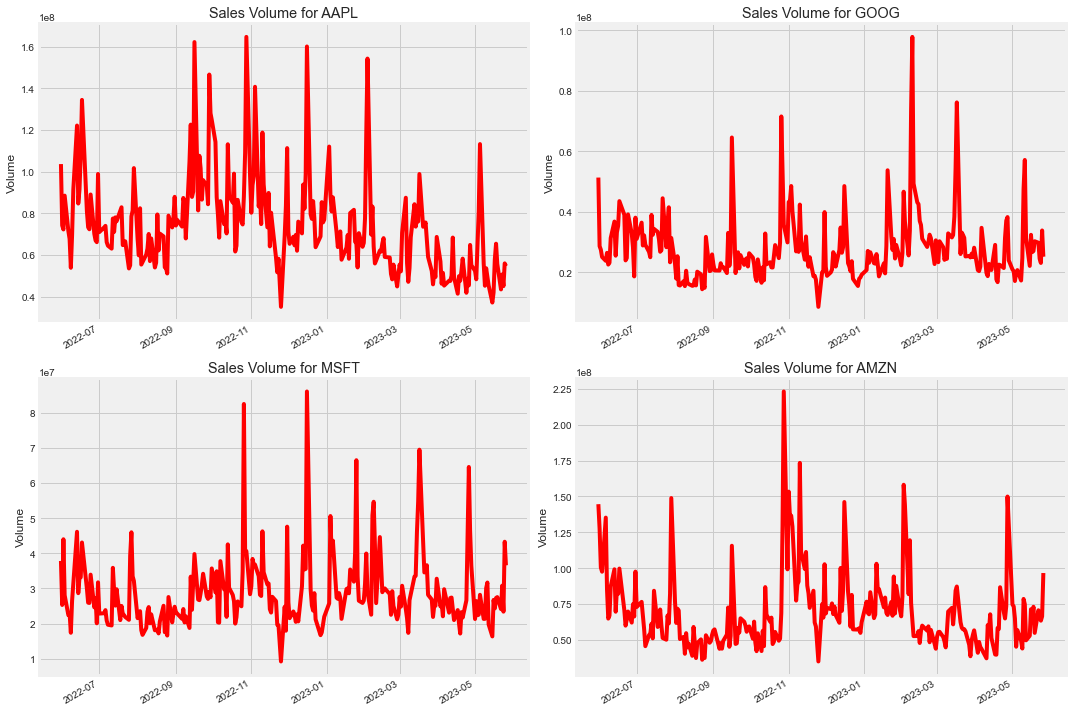

In [35]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10)) ## specified figure size of 15 X 10 inches
plt.subplots_adjust(top=1.25, bottom=1.2) ## adjusts the spacing between the subplots

for i, company in enumerate(company_list, 1): ## iterate over each company in the company_list
    plt.subplot(2, 2, i)
    company['Volume'].plot(color='red')
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}") ## adjusts the spacing between subplots to prevent overlapping labels or titles
plt.tight_layout()


## What was the moving average of the various stocks?
The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.



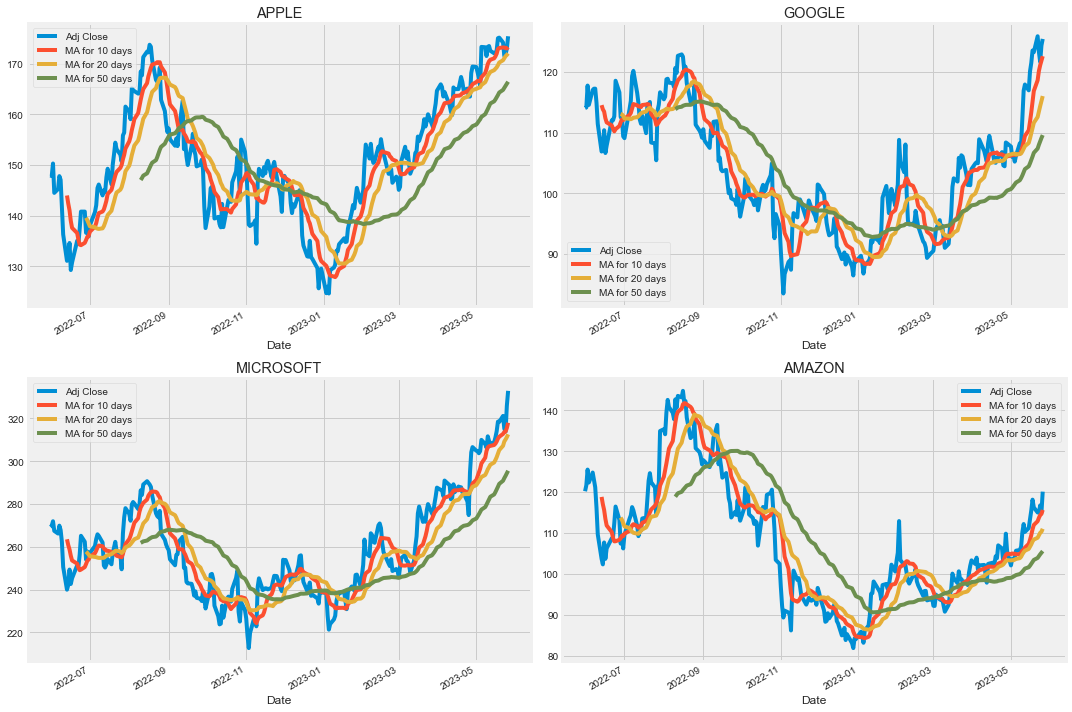

In [36]:
ma_day = [10, 20, 50] ##  list of moving average periods (in days) for which calculations will be performed

for ma in ma_day: ## Iterates over each moving average period
    for company in company_list: ## Iterates over each company in the company_list
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean() ## Calculates ma using the rolling() function on the 'Adj Close' 
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')
GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')
MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')
AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')
fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

## What was the daily return of the stock on average?
Now that we've done some baseline analysis, let's go ahead and dive a little deeper. 
We're now going to analyze the risk of the stock.
In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve daily returns for the specified stock.

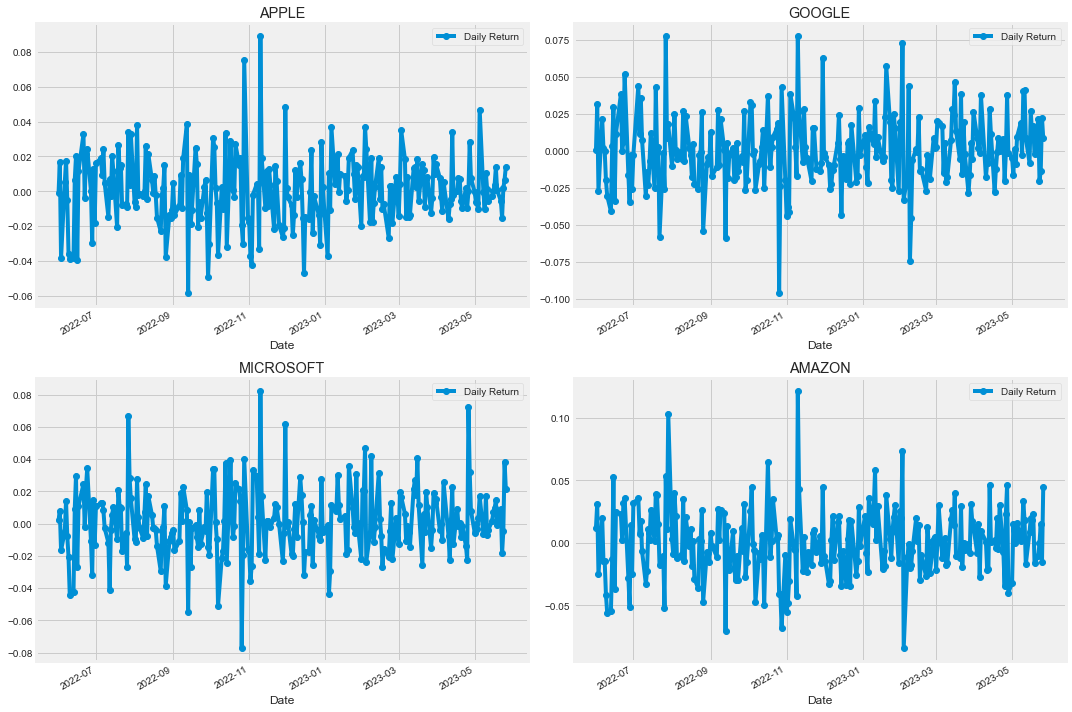

In [37]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)
AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='-', marker='o')
axes[0,0].set_title('APPLE')
GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='-', marker='o')
axes[0,1].set_title('GOOGLE')
MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='-', marker='o')
axes[1,0].set_title('MICROSOFT')
AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='-', marker='o')
axes[1,1].set_title('AMAZON')
fig.tight_layout()


In [38]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head().reset_index()

[*********************100%***********************]  4 of 4 completed


,Date,AAPL,AMZN,GOOG,MSFT
0,2022-05-31,NaN,NaN,NaN,NaN
1,2022-06-01,-0.000873,0.012266,0.000859,0.002023
2,2022-06-02,0.016811,0.031450,0.031620,0.007929
3,2022-06-03,-0.038556,-0.025185,-0.027024,-0.016607
4,2022-06-06,0.005228,0.019943,0.021355,-0.004703


### What was the correlation between different stocks closing prices?
Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

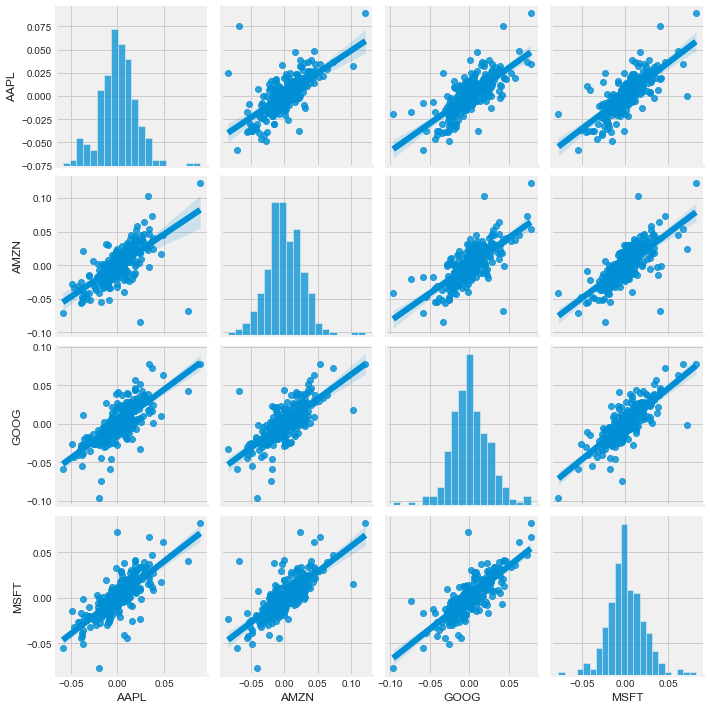

In [39]:
#We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons
sns.pairplot(tech_rets, kind='reg', palette='green')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison.



Text(0.5, 1.0, 'Correlation of stock closing price')

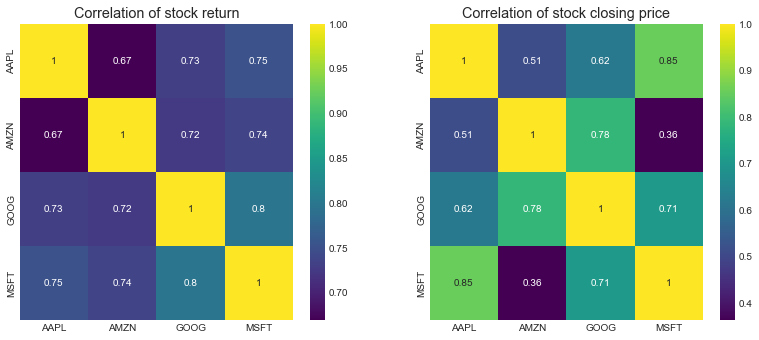

In [40]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='viridis')
plt.title('Correlation of stock return')
plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='viridis')
plt.title('Correlation of stock closing price')

Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated

## How much value do we put at risk by investing in a particular stock?
There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

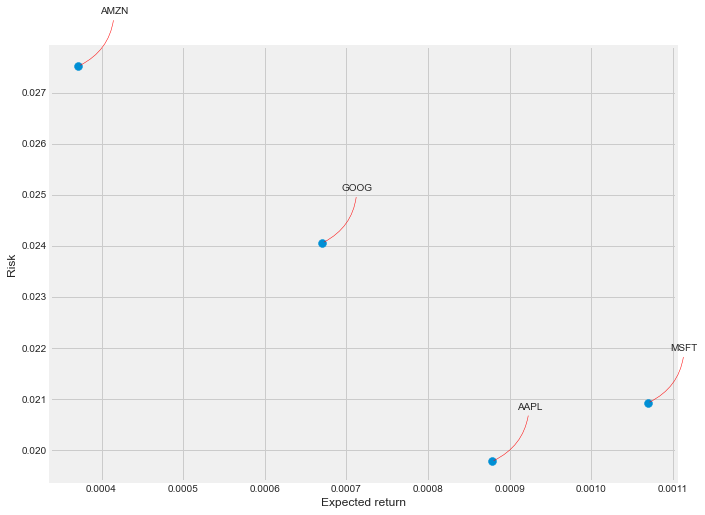

In [41]:
rets = tech_rets.dropna()
area = np.pi * 20
plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='red', connectionstyle='arc3,rad=-0.3'))


## Interpretation:

Based on the graph, we can conclude the following for all the  specified stocks:

1. The expected return for Google stock is relatively low, ranging from 0% to 0.07% and risk of Google stock is moderate, with a range of approximately 0.024 to 0.026.
2. The graph suggests that Apple stock offers a moderate level of risk, falling within the 0.020 to 0.021 range, for the expected return range of 0.00100 to 0.0010
3. The upward curve indicates a positive relationship between expected return and risk 
4. As the expected return increases, the corresponding risk also tends to increase.

5. Investors should carefully consider the trade-off between potential returns and risk when making investment decisions.




## Predicting the closing price stock price of APPLE inc using basic decomposition technique and applying arima model :

In [42]:
import statsmodels.api as sm
from statsmodels.tsa.x13 import x13_arima_analysis
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.482924,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.550008,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.689341,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.821991,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.801655,394024400
...,...,...,...,...,...,...
2023-05-22,173.979996,174.710007,173.449997,174.199997,174.199997,43570900
2023-05-23,173.130005,173.380005,171.279999,171.559998,171.559998,50747300
2023-05-24,171.089996,172.419998,170.520004,171.839996,171.839996,45143500


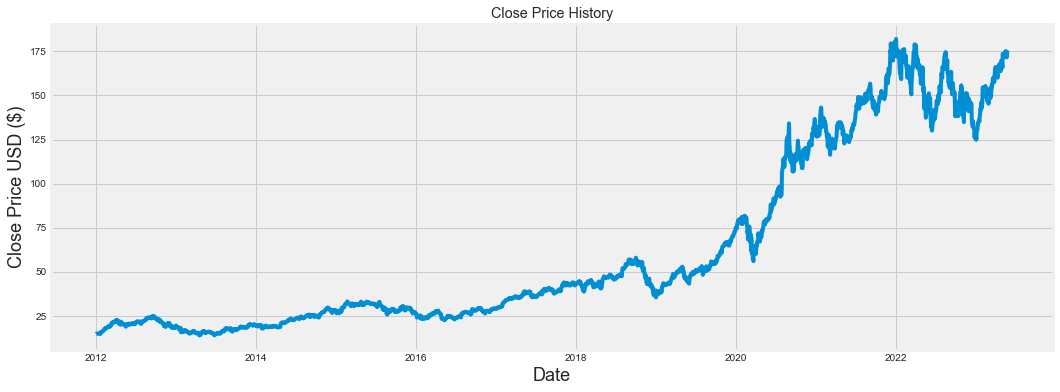

In [43]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

### Lag analysis to check how many lags are important for time series analysis

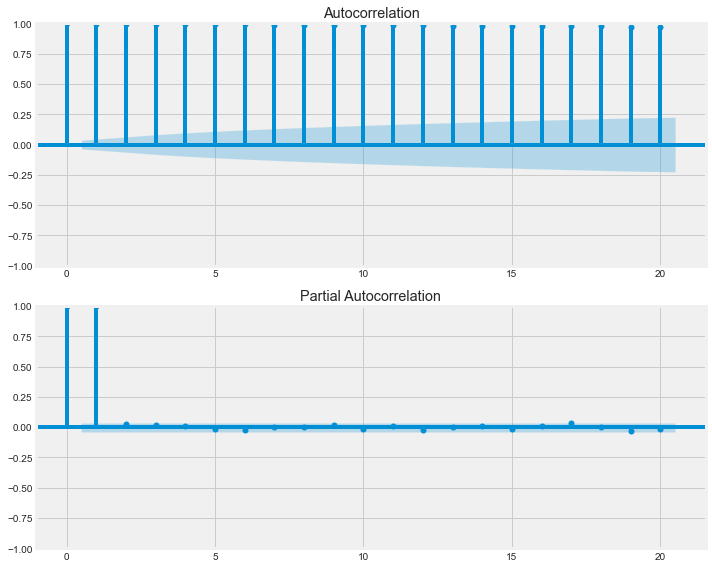

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# lag analysis
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(df['Close'], lags=20, ax=axes[0])  # ACF plot
plot_pacf(df['Close'], lags=20, ax=axes[1])  # PACF plot
plt.tight_layout()
plt.show()

### ADF statistical test for checking stationarity of data 

ADF Statistic: 0.5352218997605169
p-value: 0.9859052208911415


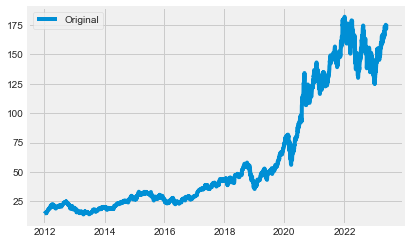

In [45]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with the time series data

# Step 1: Check the stationarity of the original series
result = adfuller(df['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Step 2: Perform differencing
#df['Differenced'] = df['Close'].diff()
#df.dropna(inplace=True)  # Remove the first NaN value

# Step 3: Check the stationarity of the differenced series
#result_diff = adfuller(df['Differenced'])
#print('ADF Statistic (Differenced):', result_diff[0])
#print('p-value (Differenced):', result_diff[1])

# Step 4: Plot the original and differenced series
plt.plot(df['Close'], label='Original')
#plt.plot(df['Differenced'], label='Differenced')
plt.legend()
plt.show()


For the original series:

ADF Statistic: 0.5352218997605169
p-value: 0.9840415005380992


the ADF statistic for the original series 0.535,since p-value is 0.9840, which is greater than 0.05. These results indicate that we fail to reject the null hypothesis and original series is likely non-stationary.

Note : To fit an ARIMA model on non-stationary data, we need to make the data stationary first. Decomposition technique helps separate the time series data into trend, seasonality, and residuals. By removing these components, we obtain deseasonalized data, which is relatively stationary and suitable for ARIMA modeling. ARIMA captures the remaining patterns and residuals. By combining decomposition and ARIMA, we can model and forecast the time series data while considering both trend and seasonality.

In [46]:
import pandas as pd
import numpy as np
import warnings
import statsmodels.api as sm
from pmdarima import auto_arima

# Ignore warnings
warnings.filterwarnings("ignore")
target_variable = df['Close']
series = pd.Series(target_variable)

# Train and test split
train_size = int(len(series) * 0.8)  # 80% of the data for training
train_data = series[:train_size]
test_data = series[train_size:]

decomposition = sm.tsa.seasonal_decompose(train_data, model='additive', period=365)
# Get the seasonal, trend, and residual components
seasonal = decomposition.seasonal
trend = decomposition.trend
residual = decomposition.resid

# Deseasonalized data (subtracting the seasonal component)
deseasonalized_data = train_data / seasonal[:len(train_data)]

# Fit an ARIMA model to the deseasonalized data using auto_arima
model = auto_arima(deseasonalized_data, seasonal=False, trace=True)
model.fit(deseasonalized_data)

# Deseasonalize the test data
#deseasonalized_test_data = test_data / seasonal[-len(test_data):]
# Deseasonalize the test data
deseasonalized_test_data = test_data / seasonal[-len(test_data):len(test_data)]

# Get the forecasted values
forecasted_values = model.predict(n_periods=len(deseasonalized_test_data))

# Create a date range for the forecasted values
forecast_dates = pd.date_range(start=test_data.index[0], periods=len(forecasted_values), freq='D')

# Create a dataframe to store the forecasted values with dates
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecasted_values})

# Print the forecasted values
print(forecast_df)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=33556.781, Time=1.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=33560.353, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=33561.961, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=33561.964, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=33565.999, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=33565.963, Time=0.12 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=33558.151, Time=1.03 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=33547.868, Time=1.23 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=33550.846, Time=0.52 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=33546.829, Time=1.13 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=33539.215, Time=1.36 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=33542.298, Time=0.96 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=33538.020, Time=1.60 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=33537.388, Time=0.79 sec
 ARIMA(5,0,1)(0,0,0

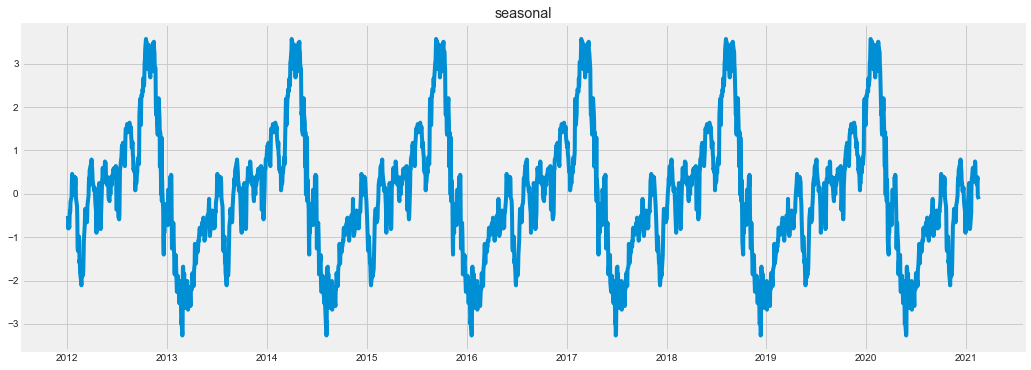

In [47]:
plt.figure(figsize=(16,6))
plt.title('seasonal')
plt.plot(seasonal)
plt.show()

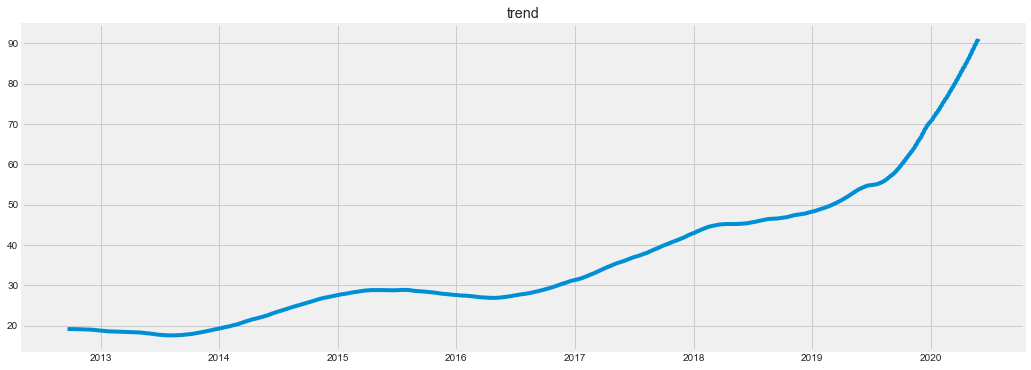

In [48]:
plt.figure(figsize=(16,6))
plt.title('trend')
plt.plot(trend)
plt.show()



#### trend
helps to understand the behaviour of data that whether the data is generally increasing, decreasing, or remaining stable over time. It is obtained by removing seasonal variations and random fluctuations.

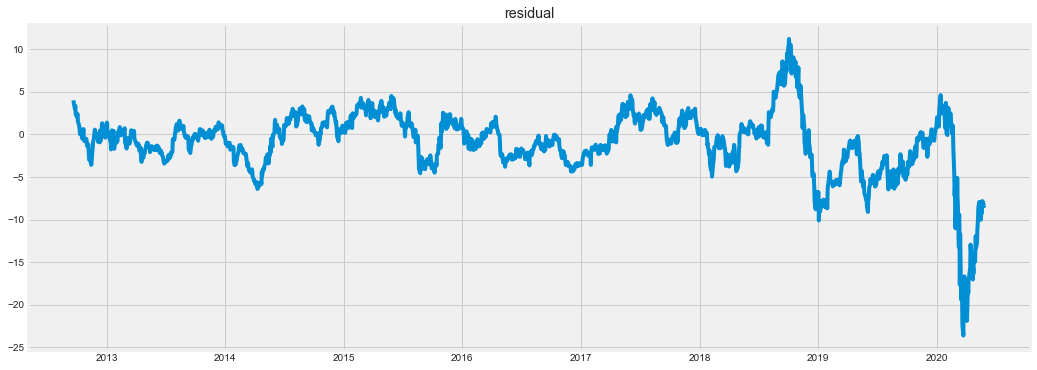

In [49]:
plt.figure(figsize=(16,6))
plt.title('residual')
plt.plot(residual)
plt.show()

#### Residuals
are the D/B what we expect to see in our data based on a model and the actual values observed.Represents the parts of the data that the model cannot explain or predict.Also, help us to assess how well our model fits the data and identify any patterns or errors that are not accounted for.






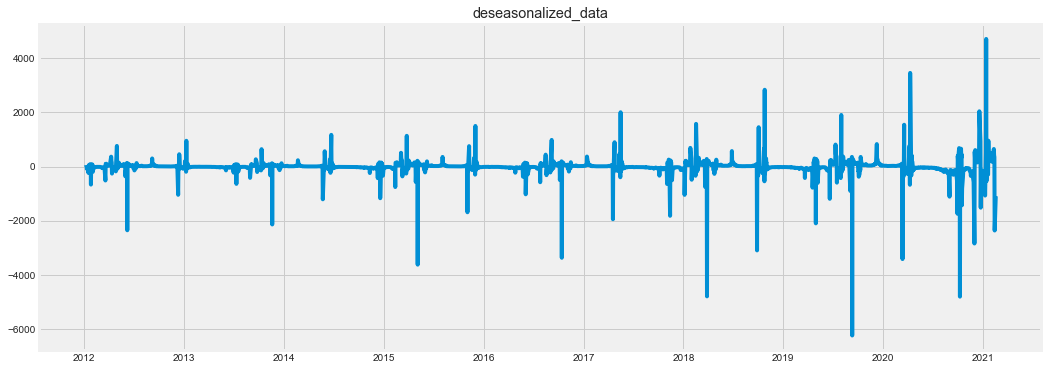

In [50]:
plt.figure(figsize=(16,6))
plt.title('deseasonalized_data')
plt.plot(deseasonalized_data)
plt.show()

#### Deseasonalized data 
obtained after removing the seasonal component ,helps to uncover the underlying trend and irregularities in the data by eliminating the predictable seasonal patterns.
Also provides a clearer view of the long-term behavior 

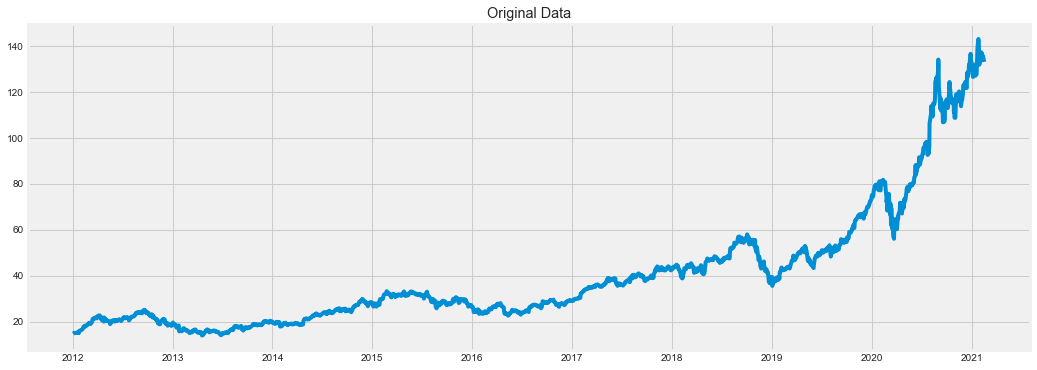

In [51]:
plt.figure(figsize=(16,6))
plt.title('Original Data')
plt.plot(train_data)
plt.show()

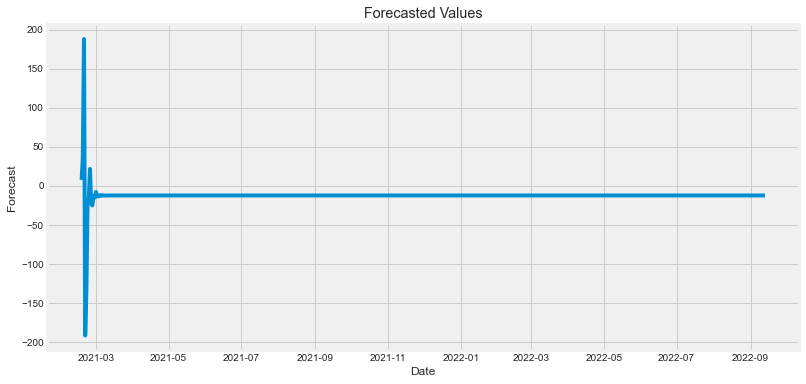

In [52]:
# Plot the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(forecast_df['Date'], forecast_df['Forecast'])
plt.title('Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Forecast')

plt.grid(True)
plt.show()

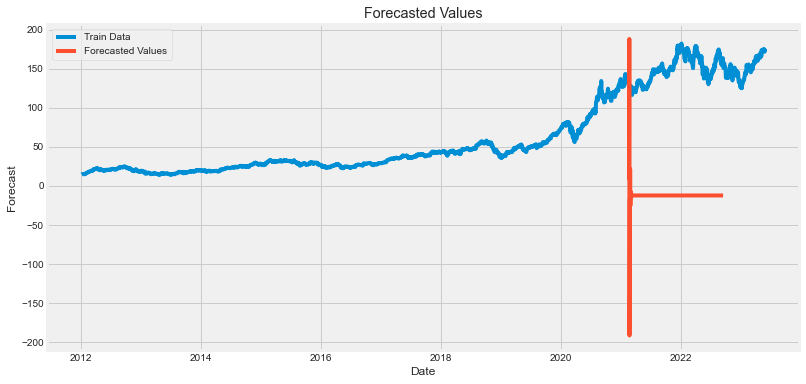

In [53]:
import matplotlib.pyplot as plt

# Plot the train data and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Train Data')
plt.plot(forecast_df['Date'], forecast_df['Forecast'], label='Forecasted Values')
plt.legend()
plt.title('Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Forecast')
plt.grid(True)
plt.show()


### Model Evaluation Metrics

In [54]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Convert the forecasted values back to the original scale
forecasted_values_original_scale = forecasted_values * seasonal[-len(test_data):].values

# Adjust the length of the forecasted values to match the test data length
forecasted_values_original_scale = forecasted_values_original_scale[:len(test_data)]

# Calculate the metrics
mae = mean_absolute_error(test_data, forecasted_values_original_scale)
mse = mean_squared_error(test_data, forecasted_values_original_scale)
rmse = np.sqrt(mse)

# Calculate MAPE, handling division by zero scenario
mape = np.mean(np.abs((test_data - forecasted_values_original_scale) / np.maximum(np.abs(test_data), 1e-8))) * 100

# Handle NaN values in MAPE
mape = np.nan_to_num(mape, nan=0.0)

# Print the metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Absolute Error (MAE): 146.11750519051373
Mean Squared Error (MSE): 22175.98773122337
Root Mean Squared Error (RMSE): 148.91604255829313
Mean Absolute Percentage Error (MAPE): 0.0


## Predicting the closing price stock price of google by using x_13 model:

In [55]:
import statsmodels.api as sm
from statsmodels.tsa.x13 import x13_arima_analysis
df1 = pdr.get_data_yahoo('GOOG', start='2012-01-01', end=datetime.now())
df1

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...
2023-05-22,123.510002,127.050003,123.449997,125.870003,125.870003,29760200
2023-05-23,124.930000,125.419998,123.050003,123.290001,123.290001,24477900
2023-05-24,121.879997,122.750000,120.750000,121.639999,121.639999,23087900


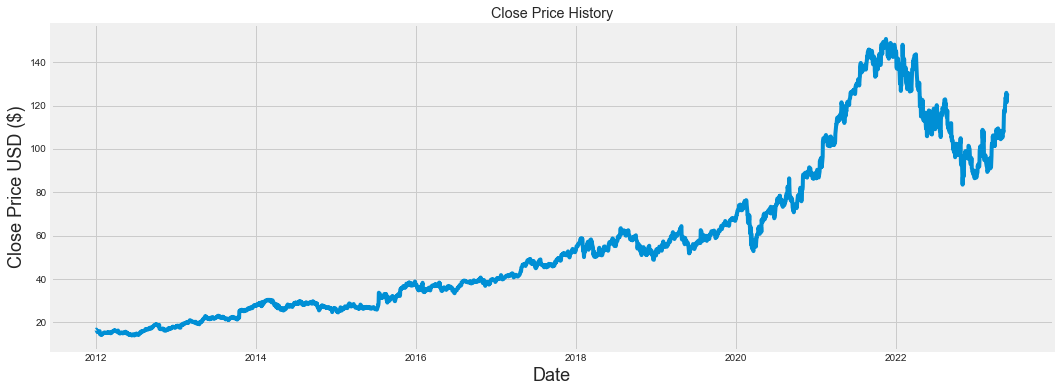

In [56]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df1['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

### Lag analysis to check how many lags are important for time series analysis

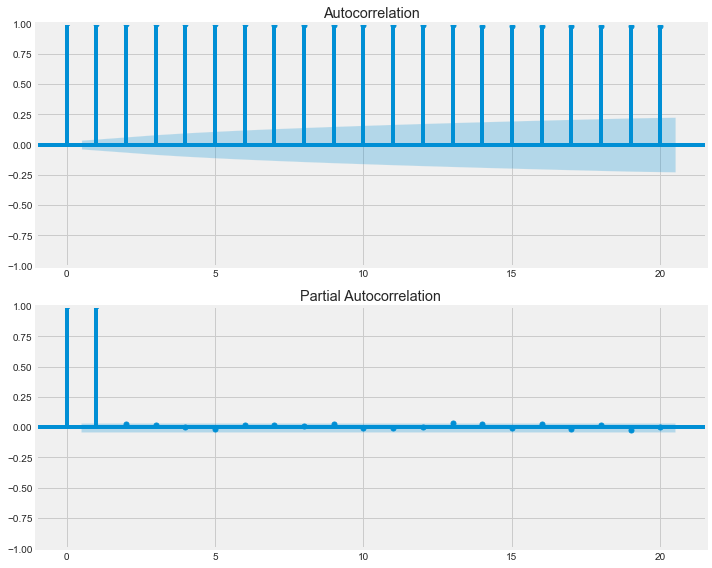

In [57]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# lag analysis
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(df1['Close'], lags=20, ax=axes[0])  # ACF plot
plot_pacf(df1['Close'], lags=20, ax=axes[1])  # PACF plot
plt.tight_layout()
plt.show()

### ADF statistical test for checking stationarity of data 

ADF Statistic: -0.01780900000912352
p-value: 0.9570342794656416


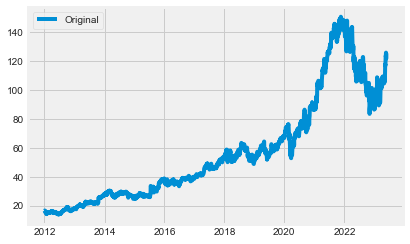

In [58]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with the time series data

# Step 1: Check the stationarity of the original series
result = adfuller(df1['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Step 2: Perform differencing
#df['Differenced'] = df['Close'].diff()
#df.dropna(inplace=True)  # Remove the first NaN value

# Step 3: Check the stationarity of the differenced series
#result_diff = adfuller(df['Differenced'])
#print('ADF Statistic (Differenced):', result_diff[0])
#print('p-value (Differenced):', result_diff[1])

# Step 4: Plot the original and differenced series
plt.plot(df1['Close'], label='Original')
#plt.plot(df['Differenced'], label='Differenced')
plt.legend()
plt.show()


The ADF statistic is a measure of how strongly a time series is trending. In this case, the ADF statistic is -0.01780900000912352. The test statistic is negative, which indicates that the time series might have a downward trend.
the p-value is significantly greater than 0.05, indicating that we cannot reject the null hypothesis. Therefore, there is weak evidence to suggest that the time series has a unit root and is non-stationary.

Note : To fit an ARIMA model on non-stationary data, we need to make the data stationary first. Decomposition technique helps separate the time series data into trend, seasonality, and residuals. By removing these components, we obtain deseasonalized data, which is relatively stationary and suitable for ARIMA modeling. ARIMA captures the remaining patterns and residuals. By combining decomposition and ARIMA, we can model and forecast the time series data while considering both trend and seasonality.

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import statsmodels.api as sm
from statsmodels.tsa.x13 import x13_arima_analysis,_find_x12
import os
from statsmodels.tools.sm_exceptions import (X13NotFoundError,
                                             IOWarning, X13Error,
                                             X13Warning)
# Create a new dataframe with only the 'Close' column
target_variable = df1['Close']
series1 = pd.Series(target_variable)

## Train and test split
train_size = int(len(series1) * 0.8)  # 80% of the data for training
train_data = series1[:train_size]
test_data = series1[train_size:]

# Perform X-13 seasonal adjustment
decomposition = sm.tsa.x13_arima_analysis(train_data, x12path=X13PATH)   
    
#X13PATH= "/Users/anshika/Downloads/WinX13/x13as"
# Set the directory path
directory_path = "/Users/anshika/Downloads/WinX13/x13as"
X13PATH= os.chdir(directory_path)
result = x13_arima_analysis(train_data, x12path=X13PATH,print_stdout=True,prefer_x13=True)
#result = x13_arima_analysis(train_data,x12path=None, prefer_x13=True)

# Get the seasonal, trend, and irregular components
seasonal = result.seasadj
trend = result.trend
irregular = result.irregular

deseasonalized_data = train_data - seasonal

# Fit an ARIMA model to the deseasonalized data using auto_arima
model = auto_arima(deseasonalized_data, seasonal=False, trace=True)
model_fit = model.fit(deseasonalized_data)

# Deseasonalized test data
deseasonalized_test_data = test_data - seasonal[-len(test_data):]

# Get the forecasted values
forecasted_values = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Plot the components
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(train_data, label='Original Data')
plt.legend()
plt.subplot(4, 1, 2)
plt.plot(seasonal, label='Seasonal Component (X-13)')
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(trend, label='Trend Component')
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(irregular, label='Irregular Component')
plt.legend()
plt.tight_layout()
plt.show()

print("Deseasonalized Test Data:")
print(deseasonalized_test_data)
print("Forecasted Values for Test Data:")
print(forecasted_values)

X13NotFoundError: x12a and x13as not found on path. Give the path, put them on PATH, or set the X12PATH or X13PATH environmental variable.

In [60]:
import sys
import os

In [61]:
os.environ

environ{'MANPATH': '/opt/homebrew/share/man::',
        'TERM_PROGRAM': 'Apple_Terminal',
        'SHELL': '/bin/zsh',
        'TERM': 'xterm-color',
        'HOMEBREW_REPOSITORY': '/opt/homebrew',
        'TMPDIR': '/var/folders/jw/n6118q9s073_cslq46brdks40000gn/T/',
        'CONDA_SHLVL': '1',
        'CONDA_PROMPT_MODIFIER': '(/opt/anaconda3) ',
        'TERM_PROGRAM_VERSION': '447',
        'TERM_SESSION_ID': '1F15523A-F103-4195-9029-C987759C3EDF',
        'USER': 'anshika',
        'CONDA_EXE': '/opt/anaconda3/bin/conda',
        'SSH_AUTH_SOCK': '/private/tmp/com.apple.launchd.BsZwILX3q7/Listeners',
        '_CE_CONDA': '',
        'CONDA_ROOT': '/Users/anshika/opt/anaconda3',
        'PATH': '/opt/anaconda3/bin:/Library/Frameworks/Python.framework/Versions/3.7/bin:/Library/Frameworks/Python.framework/Versions/3.10/bin:/Library/Frameworks/Python.framework/Versions/3.8/bin:/opt/homebrew/bin:/opt/homebrew/sbin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sb

In [62]:
sys.path.append("/Users/anshika/Downloads/WinX13/x13as")

In [63]:
def x13_arima_analysis(train_data, maxorder=(2, 1), maxdiff=(2, 1), diff=None,
                       exog=None, log=None, outlier=True, trading=False,
                       forecast_years=None, retspec=False,
                       speconly=False, start=None, freq=None,
                       print_stdout=False, x12path=None, prefer_x13=True):

    x12path = _check_x12(x12path)

    if not isinstance(train_data, (pd.DataFrame, pd.Series)):
        if start is None or freq is None:
            raise ValueError("start and freq cannot be none if train_data is not "
                             "a pandas object")
        train_data = pd.Series(train_data, index=pd.DatetimeIndex(start=start,
                                                        periods=len(train_data),
                                                        freq=freq))
def _check_x12(x12path=None):
    x12path = _find_x12(x12path)
    if not x12path:
        raise X13NotFoundError("x12a and x13as not found on path. Give the "
                               "path, put them on PATH, or set the "
                               "X12PATH or X13PATH environmental variable.")
    return x12path
        

def _find_x12(x12path=None, prefer_x13=True):
    """
    If x12path is not given, then either x13as[.exe] or x12a[.exe] must
    be found on the PATH. Otherwise, the environmental variable X12PATH or
    X13PATH must be defined. If prefer_x13 is True, only X13PATH is searched
    for. If it is false, only X12PATH is searched for.
    """
    return x12path

 As you can see above path is not getting edited.....